In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Scikit Learn
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_linnerud
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

# Importing tensorflow
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization, Add, Concatenate
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.optimizers import Adam
# Importing Keras
import keras
from keras.models import Sequential
from keras.layers import Activation
# from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

import warnings
warnings.filterwarnings('ignore')

# MNIST

In [56]:
mnist = tf.keras.datasets.mnist
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [57]:
mnist_train_images.shape

(60000, 28, 28)

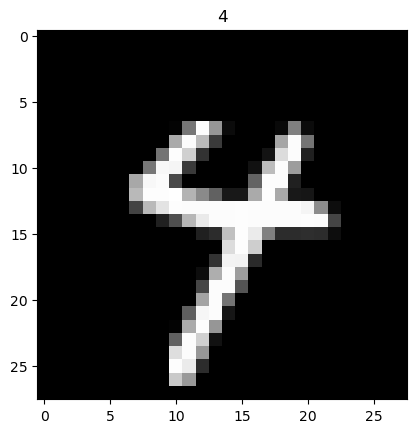

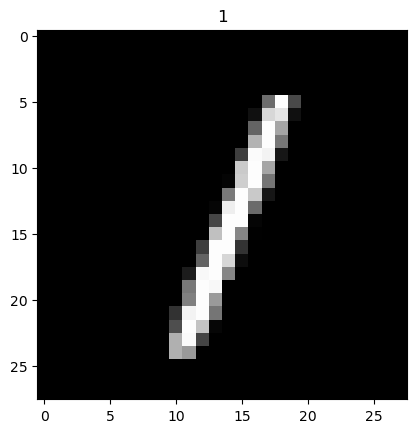

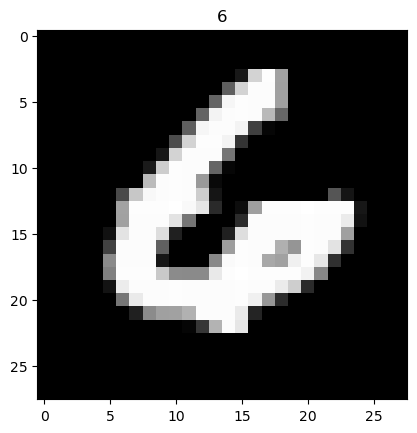

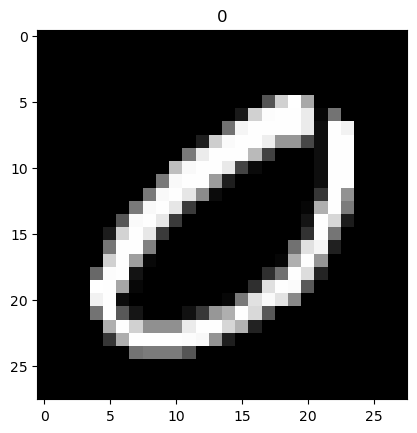

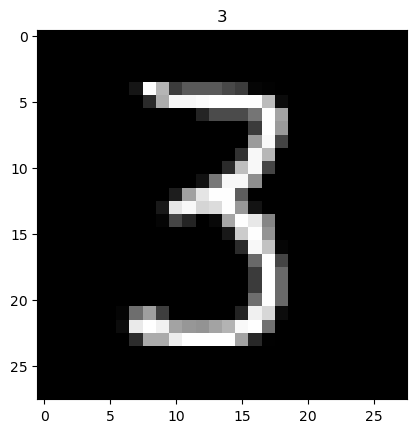

In [58]:
random_indices = np.random.randint(0, len(mnist_train_images), 5)

for index in random_indices:
    plt.imshow(mnist_train_images[index], cmap='gray') 
    plt.title(mnist_train_labels[index])
    plt.show()

In [59]:
# Converting labels to categorical data
mnist_train_labels = to_categorical(mnist_train_labels)
mnist_test_labels = to_categorical(mnist_test_labels)

In [60]:
# Normalize pixel values to be between 0 and 1
input_size = mnist_train_images.shape[1] * mnist_train_images.shape[2]
mnist_train_images = np.reshape(mnist_train_images, [-1, input_size])
mnist_train_images = mnist_train_images.astype('float32') / 255

mnist_test_images = np.reshape(mnist_test_images, [-1, input_size])
mnist_test_images = mnist_test_images.astype('float32') / 255

In [61]:
mnist_train_images.shape, mnist_test_images.shape

((60000, 784), (10000, 784))

## BUILDING MODEL

## 1

In [63]:
inputs = Input(shape = 784)
x = Dense(16,activation = 'relu')(inputs)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [64]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 16)                12560     
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                             

In [65]:
optimizer = Adam(learning_rate=0.1)

In [66]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [67]:
history = model.fit(mnist_train_images, mnist_train_labels,
                    validation_data = (mnist_test_images, mnist_test_labels),
                    epochs = 10,batch_size = 16)

Epoch 1/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.8229 - accuracy: 0.7519 - val_loss: 0.3853 - val_accuracy: 0.8922
Epoch 2/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.5900 - accuracy: 0.8454 - val_loss: 0.3721 - val_accuracy: 0.9008
Epoch 3/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.5168 - accuracy: 0.8711 - val_loss: 0.2932 - val_accuracy: 0.9276
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4742 - accuracy: 0.8832 - val_loss: 0.3588 - val_accuracy: 0.9099
Epoch 5/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4725 - accuracy: 0.8860 - val_loss: 0.2578 - val_accuracy: 0.9373
Epoch 6/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4536 - accuracy: 0.8917 - val_loss: 0.3233 - val_accuracy: 0.9238
Epoch 7/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4349 - accuracy: 0.8963 - val_loss: 0.3268 - val_ac

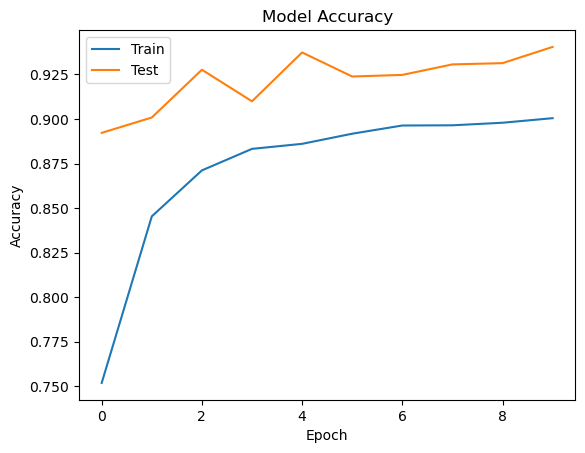

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

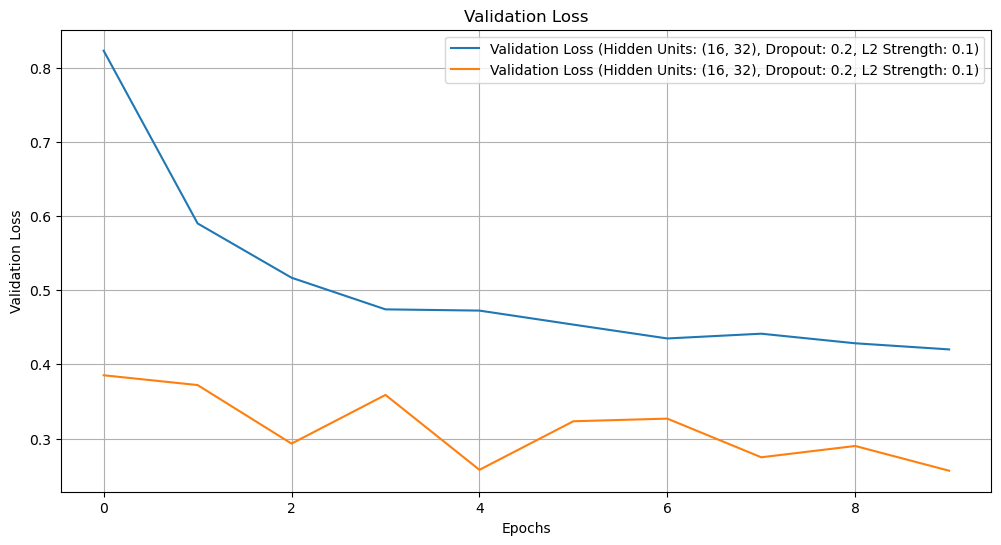

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label=f'Validation Loss (Hidden Units: {16,32}, Dropout: {0.2}, L2 Strength: {0.1})')
plt.plot(history.history['val_loss'], label=f'Validation Loss (Hidden Units: {16,32}, Dropout: {0.2}, L2 Strength: {0.1})')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## 2

In [70]:
inputs = Input(shape = 784)
x = Dense(32,activation = 'relu')(inputs)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [71]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 32)                25120     
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_10 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                           

In [72]:
optimizer = Adam(learning_rate=0.01)

In [73]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [74]:
history = model.fit(mnist_train_images, mnist_train_labels,
                    validation_data = (mnist_test_images, mnist_test_labels),
                    epochs = 10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3430 - accuracy: 0.8987 - val_loss: 0.2021 - val_accuracy: 0.9386
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2129 - accuracy: 0.9384 - val_loss: 0.1508 - val_accuracy: 0.9544
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1803 - accuracy: 0.9479 - val_loss: 0.1393 - val_accuracy: 0.9577
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9535 - val_loss: 0.1345 - val_accuracy: 0.9596
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1520 - accuracy: 0.9538 - val_loss: 0.1152 - val_accuracy: 0.9668
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1364 - accuracy: 0.9590 - val_loss: 0.1186 - val_accuracy: 0.9630
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1308 - accuracy: 0.9616 - val_loss: 0.1138 - val_accuracy

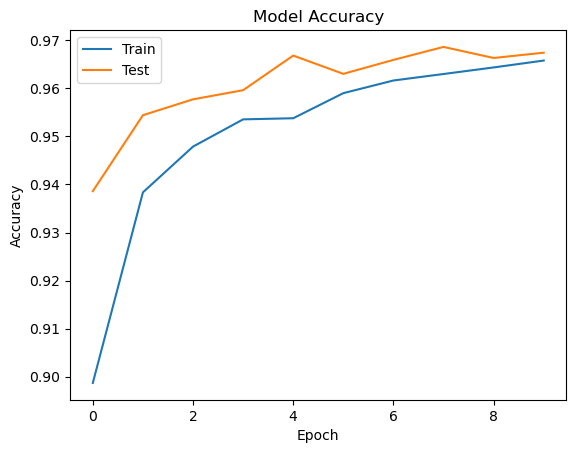

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

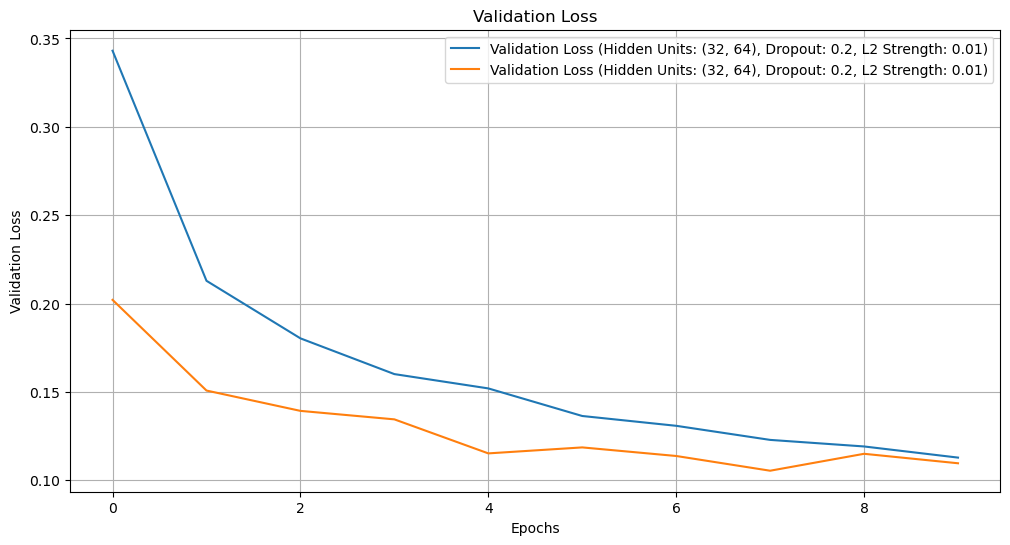

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label=f'Validation Loss (Hidden Units: {32,64}, Dropout: {0.2}, L2 Strength: {0.01})')
plt.plot(history.history['val_loss'], label=f'Validation Loss (Hidden Units: {32,64}, Dropout: {0.2}, L2 Strength: {0.01})')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## 3

In [77]:
inputs = Input(shape = 784)
x = Dense(64,activation = 'relu')(inputs)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [78]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                           

In [79]:
optimizer = Adam(learning_rate=0.001)

In [80]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [81]:
history = model.fit(mnist_train_images, mnist_train_labels,
                    validation_data = (mnist_test_images, mnist_test_labels),
                    epochs = 10,batch_size = 64)

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.3021 - accuracy: 0.9103 - val_loss: 0.1366 - val_accuracy: 0.9577
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1359 - accuracy: 0.9589 - val_loss: 0.0957 - val_accuracy: 0.9700
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0995 - accuracy: 0.9698 - val_loss: 0.1012 - val_accuracy: 0.9682
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0844 - accuracy: 0.9741 - val_loss: 0.0801 - val_accuracy: 0.9749
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0702 - accuracy: 0.9775 - val_loss: 0.0826 - val_accuracy: 0.9722
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0854 - val_accuracy: 0.9734
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 

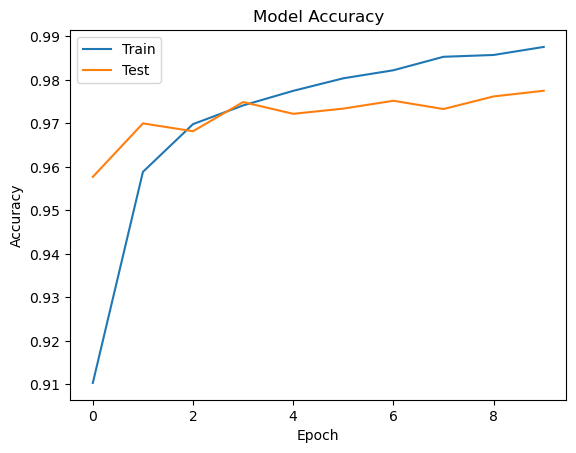

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

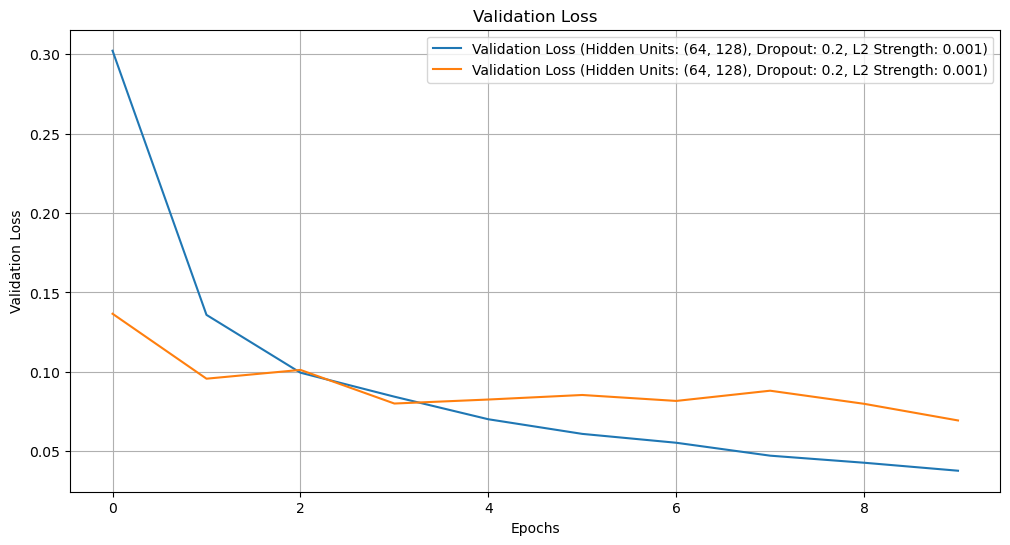

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label=f'Validation Loss (Hidden Units: {64,128}, Dropout: {0.2}, L2 Strength: {0.001})')
plt.plot(history.history['val_loss'], label=f'Validation Loss (Hidden Units: {64,128}, Dropout: {0.2}, L2 Strength: {0.001})')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# CIFAR-10

In [84]:
cifar = tf.keras.datasets.cifar10
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = cifar.load_data()

In [85]:
cifar_train_images.shape

(50000, 32, 32, 3)

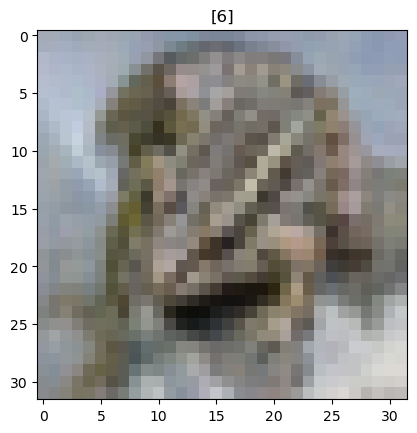

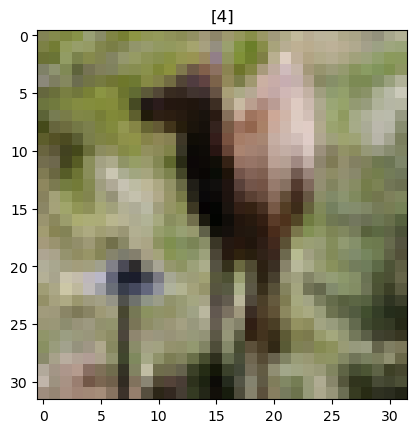

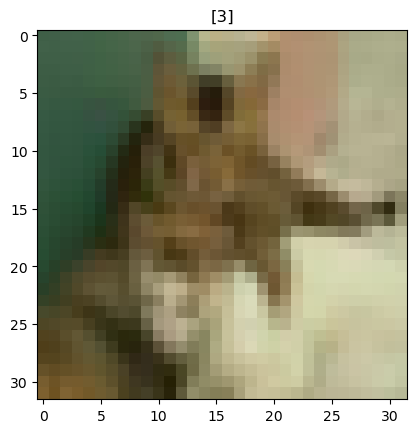

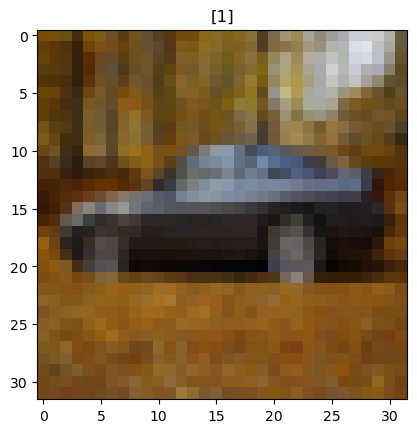

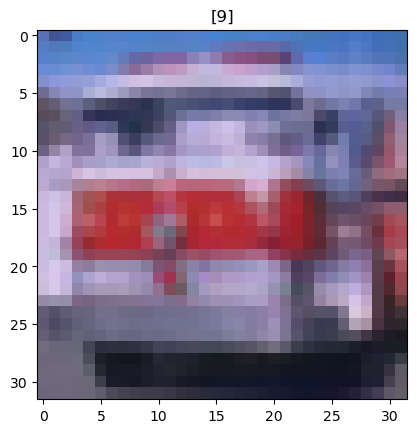

In [86]:
random_indices = np.random.randint(0, len(cifar_train_images), 5)

for index in random_indices:
    plt.imshow(cifar_train_images[index], cmap='gray') 
    plt.title(cifar_train_labels[index])
    plt.show()

In [87]:
# Converting labels to categorical data
cifar_train_labels = to_categorical(cifar_train_labels)
cifar_test_labels = to_categorical(cifar_test_labels)

In [88]:
input_size = cifar_train_images.shape[1] * cifar_train_images.shape[2] * cifar_train_images.shape[3]
cifar_train_images = np.reshape(cifar_train_images, [-1, input_size])
cifar_train_images = cifar_train_images.astype('float32') / 255

cifar_test_images = np.reshape(cifar_test_images, [-1, input_size])
cifar_test_images = cifar_test_images.astype('float32') / 255

In [89]:
cifar_train_images.shape, cifar_test_images.shape

((50000, 3072), (10000, 3072))

## BUILDING MODEL

## 1

In [90]:
inputs = Input(shape = 3072)
x = Dense(128,activation = 'relu')(inputs)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
x = Dense(256,activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [91]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_27 (Dense)            (None, 128)               393344    
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_12 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                           

In [92]:
optimizer = Adam(learning_rate=0.1)

In [93]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [94]:
history = model.fit(cifar_train_images, cifar_train_labels,
                    validation_data = (cifar_test_images, cifar_test_labels),
                    epochs = 10,batch_size = 256)

Epoch 1/10
196/196 [==============================] - 9s 26ms/step - loss: 2.1323 - accuracy: 0.1868 - val_loss: 2.0597 - val_accuracy: 0.2129
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 2.0028 - accuracy: 0.2402 - val_loss: 2.1295 - val_accuracy: 0.2312
Epoch 3/10
196/196 [==============================] - 4s 23ms/step - loss: 1.9494 - accuracy: 0.2670 - val_loss: 1.9087 - val_accuracy: 0.2964
Epoch 4/10
196/196 [==============================] - 4s 21ms/step - loss: 1.9031 - accuracy: 0.2943 - val_loss: 1.9313 - val_accuracy: 0.3058
Epoch 5/10
196/196 [==============================] - 4s 21ms/step - loss: 1.8623 - accuracy: 0.3201 - val_loss: 1.9589 - val_accuracy: 0.3161
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 1.8425 - accuracy: 0.3312 - val_loss: 1.8835 - val_accuracy: 0.3299
Epoch 7/10
196/196 [==============================] - 4s 21ms/step - loss: 1.8343 - accuracy: 0.3353 - val_loss: 1.8772 - val_accuracy: 0.3430

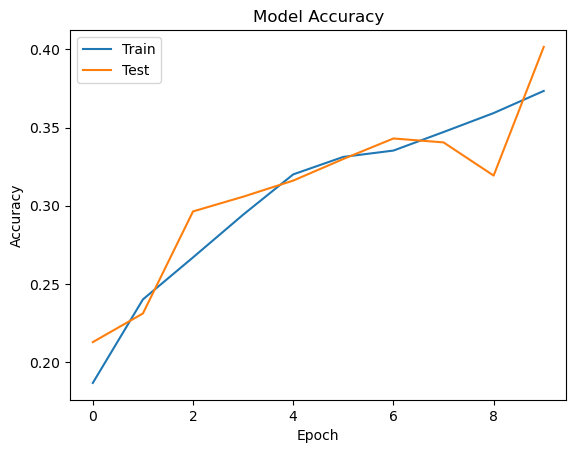

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

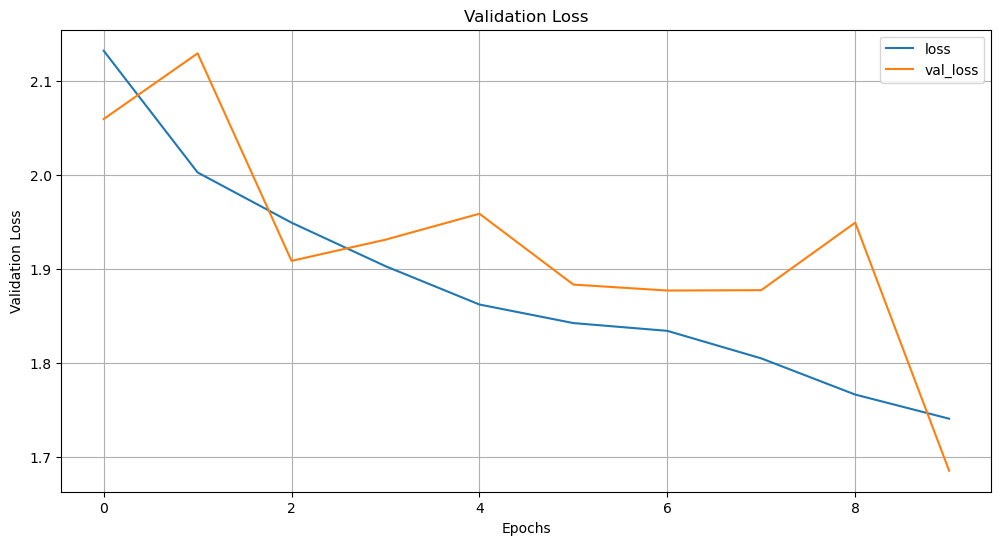

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## 2

In [97]:
inputs = Input(shape = 3072)
x = Dense(32,activation = 'relu')(inputs)
x = Dense(64,activation = 'relu')(x)
x = (BatchNormalization())(x)
x = Dense(128,activation = 'relu')(x)
x = Dense(128,activation = 'relu')(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [98]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_32 (Dense)            (None, 32)                98336     
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_14 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                           

In [99]:
optimizer = Adam(learning_rate=0.01)

In [100]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [101]:
history = model.fit(cifar_train_images, cifar_train_labels,
                    validation_data = (cifar_test_images, cifar_test_labels),
                    epochs = 10,batch_size = 64)

Epoch 1/10
782/782 [==============================] - 8s 7ms/step - loss: 1.8601 - accuracy: 0.3250 - val_loss: 2.1925 - val_accuracy: 0.2581
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.7379 - accuracy: 0.3704 - val_loss: 1.6915 - val_accuracy: 0.3953
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6913 - accuracy: 0.3900 - val_loss: 1.7488 - val_accuracy: 0.3807
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6464 - accuracy: 0.4070 - val_loss: 1.7596 - val_accuracy: 0.3745
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6192 - accuracy: 0.4157 - val_loss: 1.7199 - val_accuracy: 0.3922
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.5967 - accuracy: 0.4264 - val_loss: 1.8122 - val_accuracy: 0.3648
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 1.5772 - accuracy: 0.4308 - val_loss: 1.7807 - val_accuracy: 0.3863
Epoch 

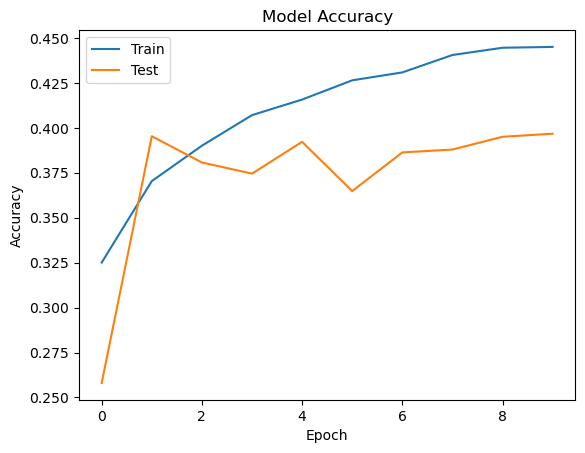

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

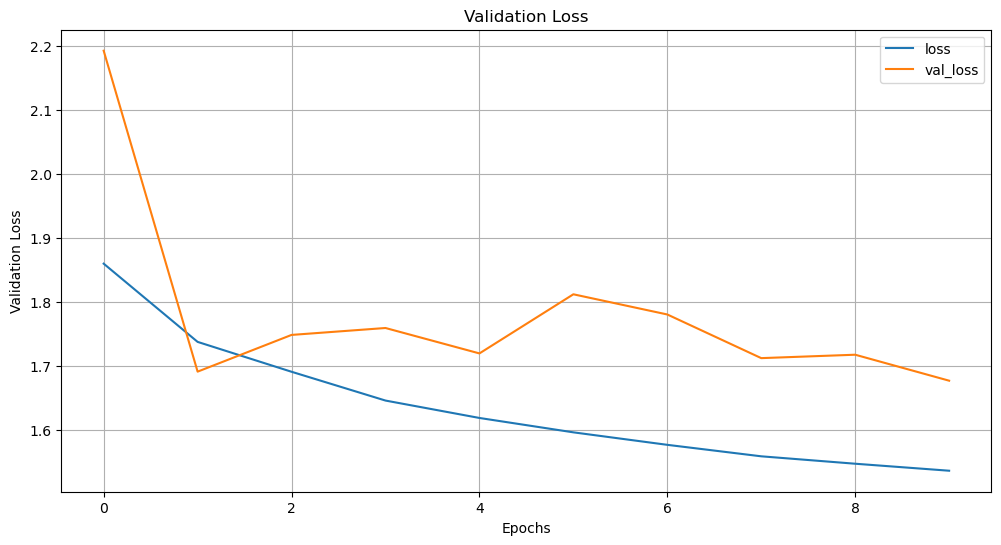

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## 3

In [106]:
inputs = Input(shape = 3072)
x = Dense(64,activation = 'relu')(inputs)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = (BatchNormalization())(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)

In [107]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_39 (Dense)            (None, 64)                196672    
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_15 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                           

In [108]:
optimizer = Adam(learning_rate=0.001)

In [109]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [110]:
history = model.fit(cifar_train_images, cifar_train_labels,
                    validation_data = (cifar_test_images, cifar_test_labels),
                    epochs = 10,batch_size = 64)

Epoch 1/10
782/782 [==============================] - 8s 7ms/step - loss: 1.9881 - accuracy: 0.2806 - val_loss: 1.9445 - val_accuracy: 0.3147
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.8114 - accuracy: 0.3507 - val_loss: 1.7435 - val_accuracy: 0.3629
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7518 - accuracy: 0.3735 - val_loss: 1.7328 - val_accuracy: 0.3621
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7080 - accuracy: 0.3896 - val_loss: 1.6705 - val_accuracy: 0.3926
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6779 - accuracy: 0.4002 - val_loss: 1.6724 - val_accuracy: 0.3967
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6505 - accuracy: 0.4080 - val_loss: 1.5883 - val_accuracy: 0.4286
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6276 - accuracy: 0.4191 - val_loss: 1.6027 - val_accuracy: 0.4262
Epoch 

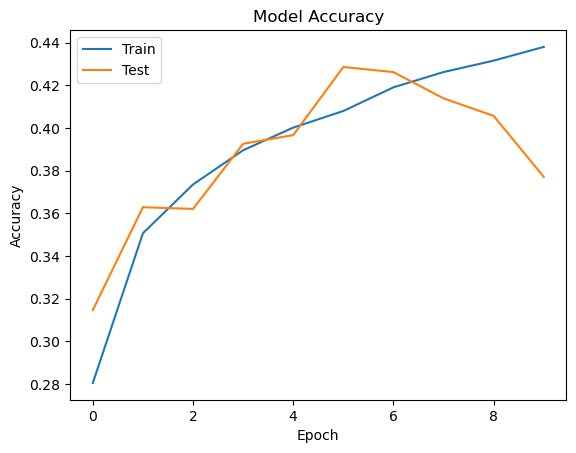

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

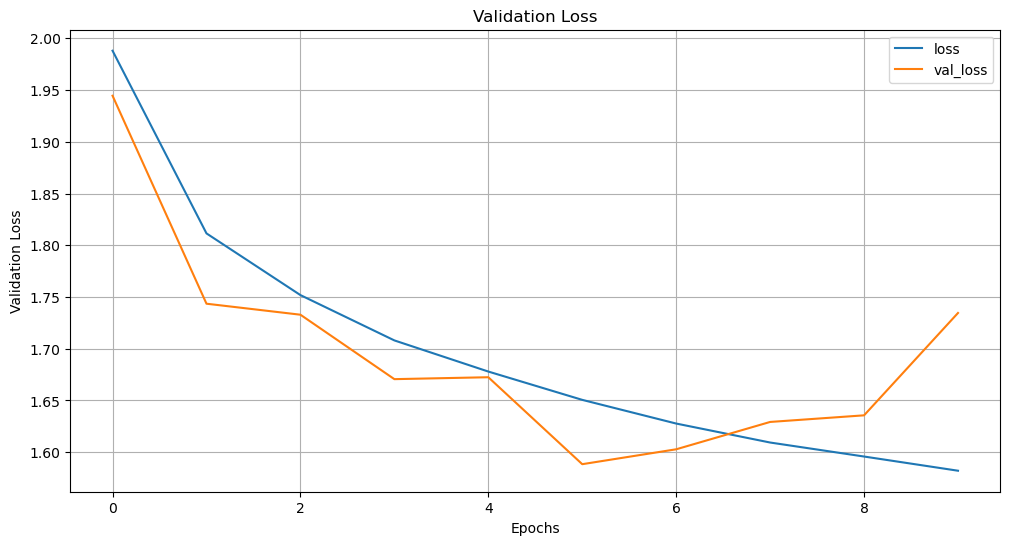

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Auto mpg

In [2]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
data[data['mpg'] == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [6]:
data = data.drop(['car name'],axis = 1)

In [7]:
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [8]:
data = data[data.apply(lambda row: all(row != '?'), axis=1)]

In [9]:
data['horsepower'] = data['horsepower'].astype(int)

In [10]:
# problematic_column = 'mpg'  # Replace with the name of your column
# problematic_rows = data[data[problematic_column] == '?']
# print(problematic_rows)

In [11]:
# for column in data.columns:
#     unique_values = data[column].unique()
#     print(f"Column '{column}' unique values: {unique_values}")

# Linear Regression

In [12]:
X = data.drop('mpg', axis=1)
y = data['mpg']

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation Root Mean Squared Error: {mse_val**0.5}")

Validation Root Mean Squared Error: 3.573533056525322


In [18]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Root Mean Squared Error: {mse_test**0.5}")

Test Root Mean Squared Error: 2.5846556372877956


In [19]:
mae = mean_absolute_error(y_val,y_val_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.6090877179151244


In [20]:
mae = mean_absolute_error(y_test,y_test_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.1235101199718125


In [21]:
r = r2_score(y_test,y_test_pred)
print(f"R2 score: {r}")

R2 score: 0.8326909352415532


# ANN

In [22]:
X_train.shape

(294, 7)

## BUILDING MODEL

## 1

In [27]:
model = tf.keras.Sequential()

model.add(layers.Input(shape=(7,))) # Input
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='linear')) # Output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                     

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train,y_train,epochs = 10,batch_size = 32,validation_data = (X_val,y_val))

Epoch 1/10
10/10 [==============================] - 4s 60ms/step - loss: 19.3766 - mse: 17.8486 - val_loss: 20.0883 - val_mse: 18.5609
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 22.9112 - mse: 21.3848 - val_loss: 18.0436 - val_mse: 16.5170
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 26.9417 - mse: 25.4144 - val_loss: 15.7288 - val_mse: 14.1999
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 20.2812 - mse: 18.7522 - val_loss: 14.9663 - val_mse: 13.4373
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 19.4666 - mse: 17.9378 - val_loss: 13.5367 - val_mse: 12.0072
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 17.1946 - mse: 15.6650 - val_loss: 12.5261 - val_mse: 10.9957
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 22.1806 - mse: 20.6479 - val_loss: 10.9977 - val_mse: 9.4640
Epoch 8/10
10/10 [==============================] - 0s 9ms/st

In [32]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
history1 = model.fit(X_train,y_train,epochs = 10,batch_size = 32,validation_data = (X_val,y_val))

Epoch 1/10
10/10 [==============================] - 4s 58ms/step - loss: 4.6803 - mae: 3.1586 - val_loss: 3.8691 - val_mae: 2.3577
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 4.7534 - mae: 3.2486 - val_loss: 3.8287 - val_mae: 2.3344
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 4.7874 - mae: 3.3016 - val_loss: 3.9754 - val_mae: 2.4995
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 5.2581 - mae: 3.7870 - val_loss: 3.7504 - val_mae: 2.2863
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 4.8063 - mae: 3.3483 - val_loss: 3.8021 - val_mae: 2.3516
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 4.4375 - mae: 2.9901 - val_loss: 3.6117 - val_mae: 2.1707
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 4.4376 - mae: 3.0033 - val_loss: 3.7349 - val_mae: 2.3104
Epoch 8/10
10/10 [==============================] - 0s 10ms/step - loss: 4.1911 - mae: 

In [33]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [34]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[rmse])
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
10/10 [==============================] - 4s 57ms/step - loss: 4.6149 - rmse: 4.0889 - val_loss: 3.5824 - val_rmse: 3.5061
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 4.3667 - rmse: 4.3544 - val_loss: 3.4531 - val_rmse: 3.3014
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 4.0457 - rmse: 3.7428 - val_loss: 3.7828 - val_rmse: 3.8474
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 4.1996 - rmse: 3.7103 - val_loss: 3.7627 - val_rmse: 3.7941
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 4.2299 - rmse: 3.8797 - val_loss: 3.6266 - val_rmse: 3.6475
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 3.9263 - rmse: 3.4492 - val_loss: 3.5530 - val_rmse: 3.6169
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 3.7319 - rmse: 3.3420 - val_loss: 3.4348 - val_rmse: 3.4617
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 4.

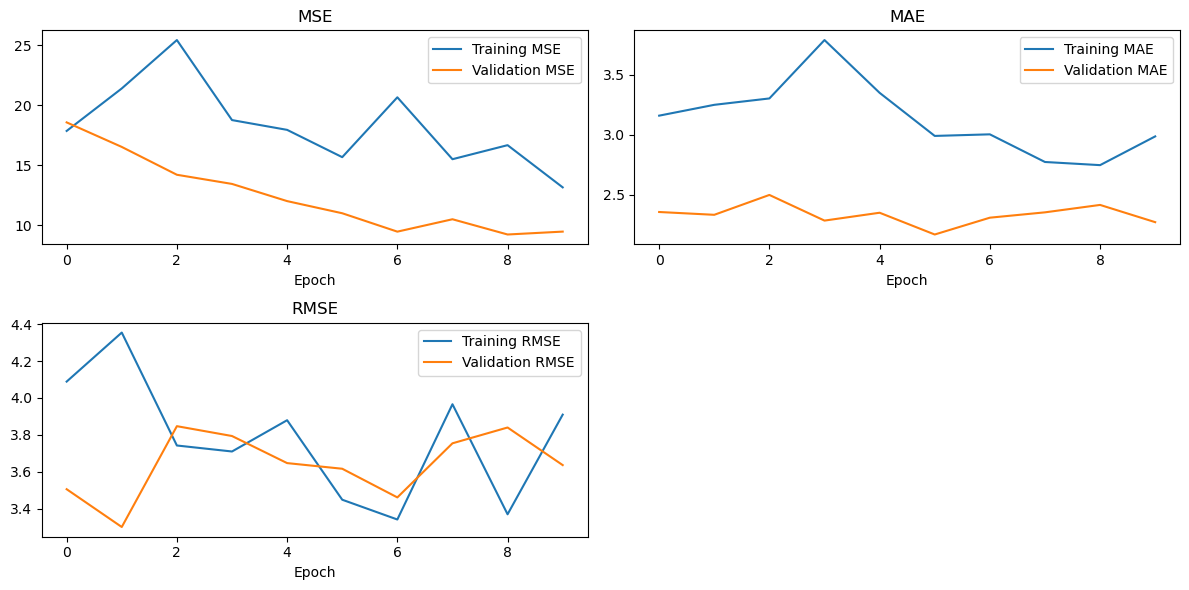

In [35]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MSE
plt.subplot(2, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MAE
plt.subplot(2, 2, 2)
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation RMSE
plt.subplot(2, 2, 3)
plt.plot(history2.history['rmse'], label='Training RMSE')
plt.plot(history2.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## 2

In [36]:
model = tf.keras.Sequential()

model.add(layers.Input(shape=(7,))) # Input
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(1, activation='linear')) # Output
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                     

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train,y_train,epochs = 10,batch_size = 16,validation_data = (X_val,y_val))

Epoch 1/10
19/19 [==============================] - 4s 34ms/step - loss: 40.3780 - mse: 25.0211 - val_loss: 33.5128 - val_mse: 18.2203
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 34.5990 - mse: 19.3746 - val_loss: 31.5050 - val_mse: 16.3576
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 34.4608 - mse: 19.3965 - val_loss: 29.4472 - val_mse: 14.4931
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 33.8870 - mse: 19.0274 - val_loss: 32.1560 - val_mse: 17.4303
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 33.0798 - mse: 18.4302 - val_loss: 29.0830 - val_mse: 14.4915
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 32.6754 - mse: 18.1603 - val_loss: 25.7459 - val_mse: 11.3165
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 31.2588 - mse: 16.9130 - val_loss: 27.1371 - val_mse: 12.9098
Epoch 8/10
19/19 [==============================] - 0s 7ms/st

In [40]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
history1 = model.fit(X_train,y_train,epochs = 10,batch_size = 16,validation_data = (X_val,y_val))

Epoch 1/10
19/19 [==============================] - 4s 31ms/step - loss: 15.9108 - mae: 2.8815 - val_loss: 15.0821 - val_mae: 2.8269
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 14.7361 - mae: 3.1031 - val_loss: 14.2363 - val_mae: 3.2779
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 13.3317 - mae: 2.8333 - val_loss: 12.8635 - val_mae: 2.8779
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 12.4099 - mae: 2.8443 - val_loss: 12.2142 - val_mae: 3.1593
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 11.8105 - mae: 3.1397 - val_loss: 11.7738 - val_mae: 3.5126
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 10.8314 - mae: 2.8550 - val_loss: 10.7909 - val_mae: 3.1537
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 10.4084 - mae: 3.0658 - val_loss: 10.3629 - val_mae: 3.3582
Epoch 8/10
19/19 [==============================] - 0s 8ms/step - loss: 9.8

In [41]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [42]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[rmse])
history2 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/10
19/19 [==============================] - 4s 31ms/step - loss: 8.7956 - rmse: 4.2718 - val_loss: 8.5398 - val_rmse: 4.6602
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 8.0133 - rmse: 3.6566 - val_loss: 8.3739 - val_rmse: 4.9942
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 7.8184 - rmse: 3.7213 - val_loss: 8.0863 - val_rmse: 4.9321
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 7.5237 - rmse: 3.9150 - val_loss: 7.5050 - val_rmse: 4.3688
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 7.0095 - rmse: 3.6409 - val_loss: 7.3650 - val_rmse: 4.4197
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 7.1529 - rmse: 4.0164 - val_loss: 6.7367 - val_rmse: 3.7804
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 6.8861 - rmse: 4.1468 - val_loss: 6.6545 - val_rmse: 4.0406
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 6.4

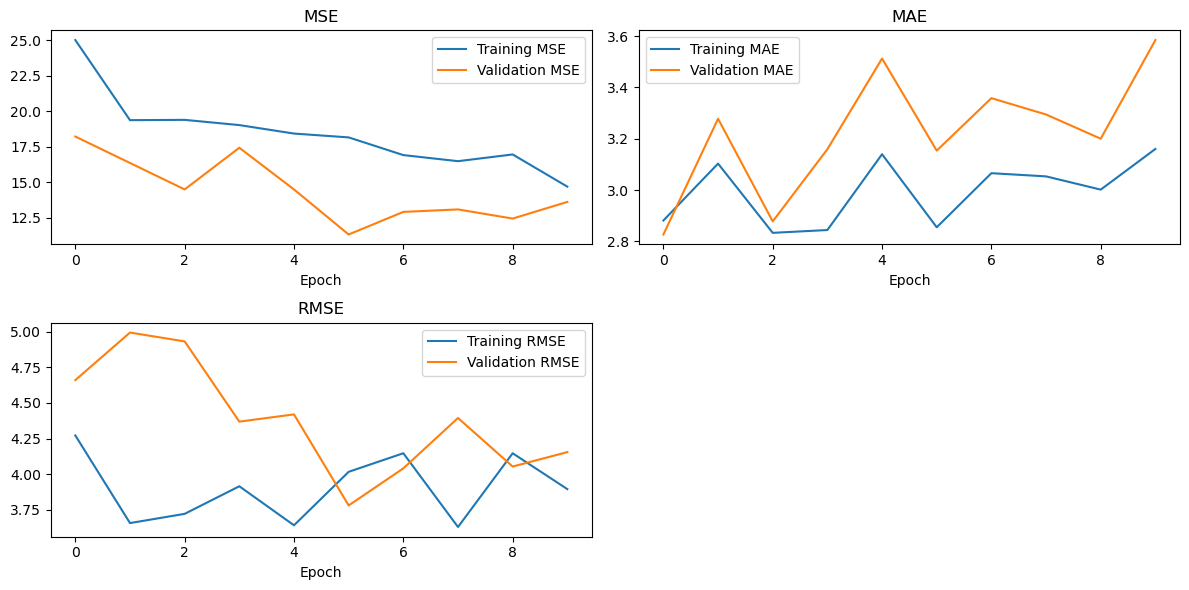

In [43]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MSE
plt.subplot(2, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MAE
plt.subplot(2, 2, 2)
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation RMSE
plt.subplot(2, 2, 3)
plt.plot(history2.history['rmse'], label='Training RMSE')
plt.plot(history2.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## 3

In [44]:
model = tf.keras.Sequential()

model.add(layers.Input(shape=(7,))) # Input
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='linear')) # Output
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                512       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                     

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train,y_train,epochs = 10,batch_size = 64,validation_data = (X_val,y_val))

Epoch 1/10
5/5 [==============================] - 4s 121ms/step - loss: 14.3471 - mse: 14.1302 - val_loss: 23.0651 - val_mse: 22.8482
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 11.0697 - mse: 10.8528 - val_loss: 26.6272 - val_mse: 26.4105
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 11.7122 - mse: 11.4956 - val_loss: 25.7690 - val_mse: 25.5524
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 13.0011 - mse: 12.7843 - val_loss: 22.0604 - val_mse: 21.8435
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 10.0713 - mse: 9.8542 - val_loss: 19.4274 - val_mse: 19.2102
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 11.9543 - mse: 11.7369 - val_loss: 20.7719 - val_mse: 20.5546
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 9.9267 - mse: 9.7093 - val_loss: 20.9342 - val_mse: 20.7168
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 

In [51]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
history1 = model.fit(X_train,y_train,epochs = 10,batch_size = 64,validation_data = (X_val,y_val))

Epoch 1/10
5/5 [==============================] - 4s 125ms/step - loss: 2.6388 - mae: 2.4209 - val_loss: 3.4027 - val_mae: 3.1850
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 2.8247 - mae: 2.6071 - val_loss: 3.4679 - val_mae: 3.2506
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 2.5226 - mae: 2.3056 - val_loss: 3.6060 - val_mae: 3.3892
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 2.6165 - mae: 2.3998 - val_loss: 3.5210 - val_mae: 3.3044
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 2.5097 - mae: 2.2930 - val_loss: 3.2984 - val_mae: 3.0816
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 2.5902 - mae: 2.3734 - val_loss: 3.0428 - val_mae: 2.8259
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 2.4728 - mae: 2.2560 - val_loss: 3.0637 - val_mae: 2.8470
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 2.3113 - mae: 2.0949 - va

In [52]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [53]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[rmse])
history2 = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
5/5 [==============================] - 4s 140ms/step - loss: 2.6587 - rmse: 3.3245 - val_loss: 3.0574 - val_rmse: 3.9144
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 2.6234 - rmse: 3.2802 - val_loss: 2.7465 - val_rmse: 3.5082
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 2.9502 - rmse: 3.8191 - val_loss: 2.8878 - val_rmse: 3.7322
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 2.5371 - rmse: 3.0958 - val_loss: 2.8011 - val_rmse: 3.6116
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 2.5003 - rmse: 3.2610 - val_loss: 3.0133 - val_rmse: 3.8397
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 2.2556 - rmse: 2.9010 - val_loss: 2.9678 - val_rmse: 3.7495
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 2.4431 - rmse: 3.1377 - val_loss: 2.8890 - val_rmse: 3.6160
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 2.5070 - rm

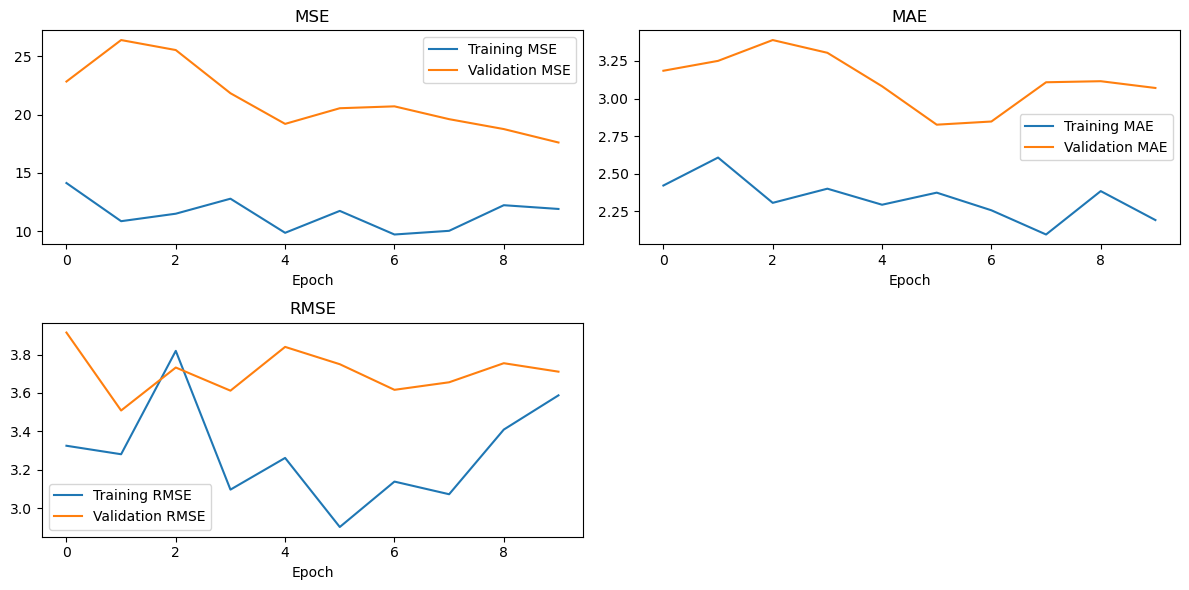

In [54]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MSE
plt.subplot(2, 2, 1)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MAE
plt.subplot(2, 2, 2)
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation RMSE
plt.subplot(2, 2, 3)
plt.plot(history2.history['rmse'], label='Training RMSE')
plt.plot(history2.history['val_rmse'], label='Validation RMSE')
plt.title('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()